In [7]:
import pandas as pd
from scipy import stats
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
df1 = pd.read_csv('1.csv', encoding='utf-8')
df2 = pd.read_csv('2.csv', encoding='ISO-8859-1')
df3 = pd.read_csv('3.csv', encoding='utf-8')
#Integration
combined_df = pd.concat([df1, df2, df3], axis=1)
combined_df.to_csv('tashi.csv', index=False)
print("Datasets combined successfully into 'tashi.csv'")

C:\Users\USER\AppData\Local\Temp\ipykernel_5260\3961579109.py:8: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('3.csv', encoding='utf-8')


Datasets combined successfully into 'tashi.csv'


In [9]:
tashi_df = pd.read_csv('tashi.csv')
#Columns in the integrated file
print("Columns in 'tashi.csv':")
print(tashi_df.columns)

C:\Users\USER\AppData\Local\Temp\ipykernel_5260\2532819079.py:1: DtypeWarning: Columns (0,4,5,7,8,9,10,11,12,13,14,15,16,18,21,23,24,25,29,30,31,33,34,35,36,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  tashi_df = pd.read_csv('tashi.csv')


Columns in 'tashi.csv':
Index(['Series_reference', 'Period', 'growth_rate', 'Data_value', 'STATUS',
       'UNITS', 'MAGNTUDE', 'Subject', 'Group', 'Series_title_1',
       'Series_title_2', 'Series_title_3', 'Series_title_4', 'Series_title_5',
       'InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'item_id', 'status', 'created_at',
       'sku', 'price', 'qty_ordered', 'grand_total', 'increment_id',
       'category_name_1', 'sales_commission_code', 'discount_amount',
       'payment_method', 'Working Date', 'BI Status', ' MV ', 'Year', 'Month',
       'Customer Since', 'M-Y', 'FY', 'Customer ID', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')


In [11]:
#Removing fazool columns
remove_cols = ['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25']
tashi_df.drop(columns=remove_cols, inplace=True)

# Filling missing values (MEAN)
numeric_columns = ['Period', 'growth_rate', 'Data_value', 'MAGNTUDE', 'Quantity',
                   'UnitPrice', 'CustomerID', 'item_id', 'price', 'qty_ordered',
                   'grand_total', 'discount_amount', 'Year', 'Month', 'Customer ID']

for column in numeric_columns:
    tashi_df[column].fillna(tashi_df[column].mean(), inplace=True)

tashi_df.to_csv('tashi.csv', index=False)
print("Missing values filled and unnecessary columns removed in 'tashi.csv'")

C:\Users\USER\AppData\Local\Temp\ipykernel_5260\2789524090.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tashi_df[column].fillna(tashi_df[column].mean(), inplace=True)
C:\Users\USER\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Missing values filled and unnecessary columns removed in 'tashi.csv'


In [13]:
#Detecting outliers
zscore = np.abs(stats.zscore(tashi_df[numeric_columns].select_dtypes(include=np.number)))
tashi_limit = 2.5
outlierscore = (zscore > tashi_limit).any(axis=1)
num_outliers = np.sum(outlierscore)
print(f"Number of outliers (Z-score method): {num_outliers}")
#Removing Outliers
cleaned_df = tashi_df[~outlierscore]
print("\n")
print("DATASET WITH OURLIERS REMOVED")
tashi_df.head()

C:\Users\USER\anaconda3\Lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\USER\anaconda3\Lib\site-packages\numpy\core\_methods.py:152: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)


Number of outliers (Z-score method): 143224


DATASET WITH OURLIERS REMOVED


,Series_reference,Period,growth_rate,Data_value,STATUS,UNITS,MAGNTUDE,Subject,Group,Series_title_1,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,OTPA.SEA1BS1,1925.06,NaN,59.547263,FINAL,Index,0.0,Overseas Trade Indexes - Prices - OTP,Export price indexes - analytical,Price,...,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,OTPA.SEA1AN1,1925.06,-33.140269,39.813140,FINAL,Index,0.0,Overseas Trade Indexes - Prices - OTP,Export price indexes - analytical,Price,...,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,OTPA.SEA1BR1,1925.06,33.922276,53.318663,FINAL,Index,0.0,Overseas Trade Indexes - Prices - OTP,Export price indexes - analytical,Price,...,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,OTPA.SEA1BK1,1925.06,77.802118,94.801711,FINAL,Index,0.0,Overseas Trade Indexes - Prices - OTP,Export price indexes - analytical,Price,...,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,OTPA.SEA1AE1,1925.06,-54.074642,43.538025,FINAL,Index,0.0,Overseas Trade Indexes - Prices - OTP,Export price indexes - analytical,Price,...,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0


In [19]:
normalized_cols = [col for col in numeric_columns if col != 'CustomerID']
scaler = MinMaxScaler()
#Normalization of Numerical Columns
tashi_data = scaler.fit_transform(cleaned_df[normalized_cols])
tashi_normalized = pd.DataFrame(tashi_data, columns=normalized_cols, index=cleaned_df.index)
cleaned_df = cleaned_df.drop(columns=normalized_cols).join(tashi_normalized)
print(cleaned_df.head())


      Series_reference   STATUS  UNITS  \
19357    OTVQ.SIS2LS1S  REVISED  Index   
19358    OTVQ.SIT2PA1T  REVISED  Index   
19359     OTPA.SEA1BT1    FINAL  Index   
19360     OTPA.SIB1PN1    FINAL  Index   
19361     OTVQ.SEA2AG1    FINAL  Index   

                                                 Subject  \
19357  Overseas Trade Indexes - Volumes and Values - OTV   
19358  Overseas Trade Indexes - Volumes and Values - OTV   
19359              Overseas Trade Indexes - Prices - OTP   
19360              Overseas Trade Indexes - Prices - OTP   
19361  Overseas Trade Indexes - Volumes and Values - OTV   

                                                   Group Series_title_1  \
19357  Import volume indexes and values - analytical ...         Volume   
19358  Import volume indexes - by BEC - seasonally ad...         Volume   
19359                  Export price indexes - analytical          Price   
19360                      Import price indexes - by BEC          Price   
19361      

In [29]:
#Label Encoing of Categorial Data
label_encoders = {}

for col in categorical_columns:
    tashi_LE = LabelEncoder()
    cleaned_df[col] = tashi_LE.fit_transform(cleaned_df[col])
    label_encoders[col] = tashi_LE

print(cleaned_df.head())

       Series_reference  STATUS  UNITS  Subject  Group  Series_title_1  \
19357               766       3      0        1     18              12   
19358               789       3      0        1     14              12   
19359                44       1      0        0      0               5   
19360               166       1      0        0     12               5   
19361               612       1      0        1      5              12   

       Series_title_2  Series_title_3  Series_title_4  Series_title_5  ...  \
19357             158               3               2               1  ...   
19358              24               3               3               1  ...   
19359             121               3               4               1  ...   
19360              85               3               4               1  ...   
19361              58               3               4               1  ...   

       Quantity  UnitPrice   item_id     price  qty_ordered  grand_total  \
19357  0.5

In [31]:
# adding 3 features to existing data
cleaned_df['Total_Sales'] = cleaned_df['UnitPrice'] * cleaned_df['Quantity']
cleaned_df['Discount_Effectiveness'] = cleaned_df['discount_amount'] / cleaned_df['Total_Sales']
cleaned_df['Sales_per_Customer'] = cleaned_df.groupby('CustomerID')['Total_Sales'].transform('sum')
print(cleaned_df.head())

       Series_reference  STATUS  UNITS  Subject  Group  Series_title_1  \
19357               766       3      0        1     18              12   
19358               789       3      0        1     14              12   
19359                44       1      0        0      0               5   
19360               166       1      0        0     12               5   
19361               612       1      0        1      5              12   

       Series_title_2  Series_title_3  Series_title_4  Series_title_5  ...  \
19357             158               3               2               1  ...   
19358              24               3               3               1  ...   
19359             121               3               4               1  ...   
19360              85               3               4               1  ...   
19361              58               3               4               1  ...   

          price  qty_ordered  grand_total discount_amount  Year     Month  \
19357  0.

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

numeric_df = cleaned_df.select_dtypes(include=[np.number])
numeric_df.replace([np.inf, -np.inf], np.nan, inplace=True)

numeric_df.fillna(numeric_df.mean(), inplace=True)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_df)

pca = PCA(n_components=0.80)
pca_result = pca.fit_transform(scaled_features)

pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
pca_df.to_csv('pca_transformed_data.csv', index=False)


In [35]:
t=pd.read_csv("pca_transformed_data.csv")
print(t.head())
print("\n\n")
print(t.tail())

         PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
0   9.861283  -6.822723 -1.731462  1.451288 -0.741520 -7.768062  7.604761   
1  10.935898  -7.370798 -1.088178 -1.330658  0.086823 -7.082344  4.410185   
2  13.930707 -11.190329  3.762709 -0.714091 -3.705798 -8.009727 -4.263898   
3  13.274673 -11.235710  1.871782  0.349456 -2.224106 -5.488060 -3.758110   
4  11.344398  -8.367780  0.571653  0.303426 -0.499719 -6.080894 -0.681096   

        PC8       PC9      PC10      PC11      PC12  
0  2.802722  4.230271  0.202138 -2.571062 -1.679803  
1  0.326635  5.155581  0.369384 -2.110709 -2.051798  
2 -1.574536  0.688618  0.137279  0.285703 -0.672079  
3 -1.572384  4.301182  0.250010 -2.217446 -2.040108  
4 -0.992035  4.816716  0.303720 -2.586480 -1.859146  



             PC1      PC2       PC3       PC4      PC5       PC6       PC7  \
905346 -2.814076 -1.54925 -0.118081  0.117331  0.05957  0.050448 -0.002054   
905347 -2.814076 -1.54925 -0.118081  0.117331  0.05957

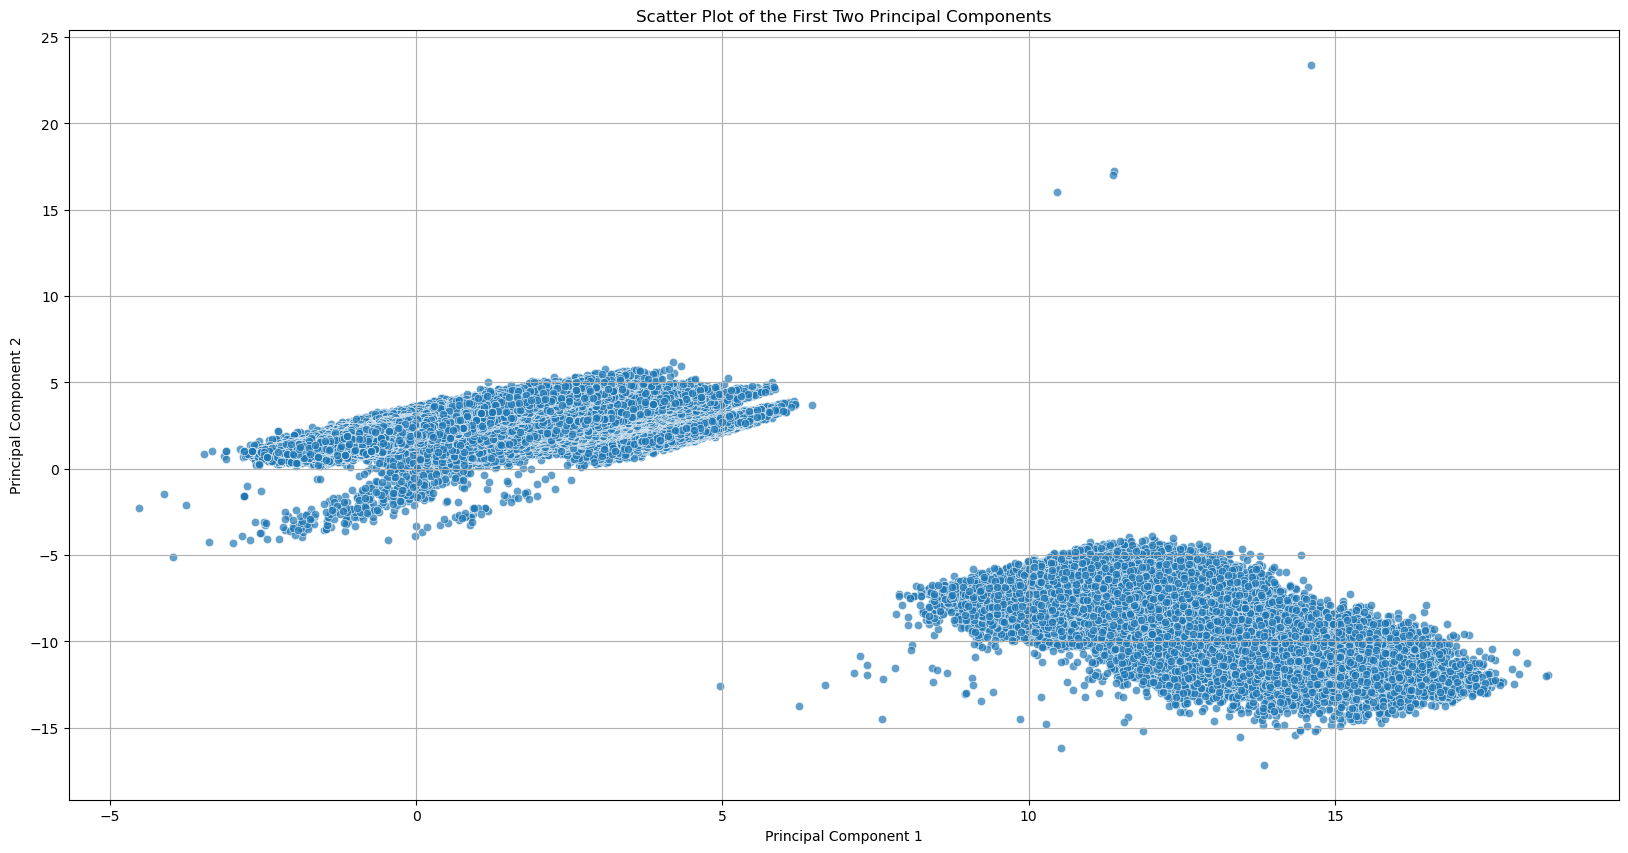

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
pca_df = pd.read_csv('pca_transformed_data.csv')
# Scatter plot
plt.figure(figsize=(20,10))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.7)
plt.title('Scatter Plot of the First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

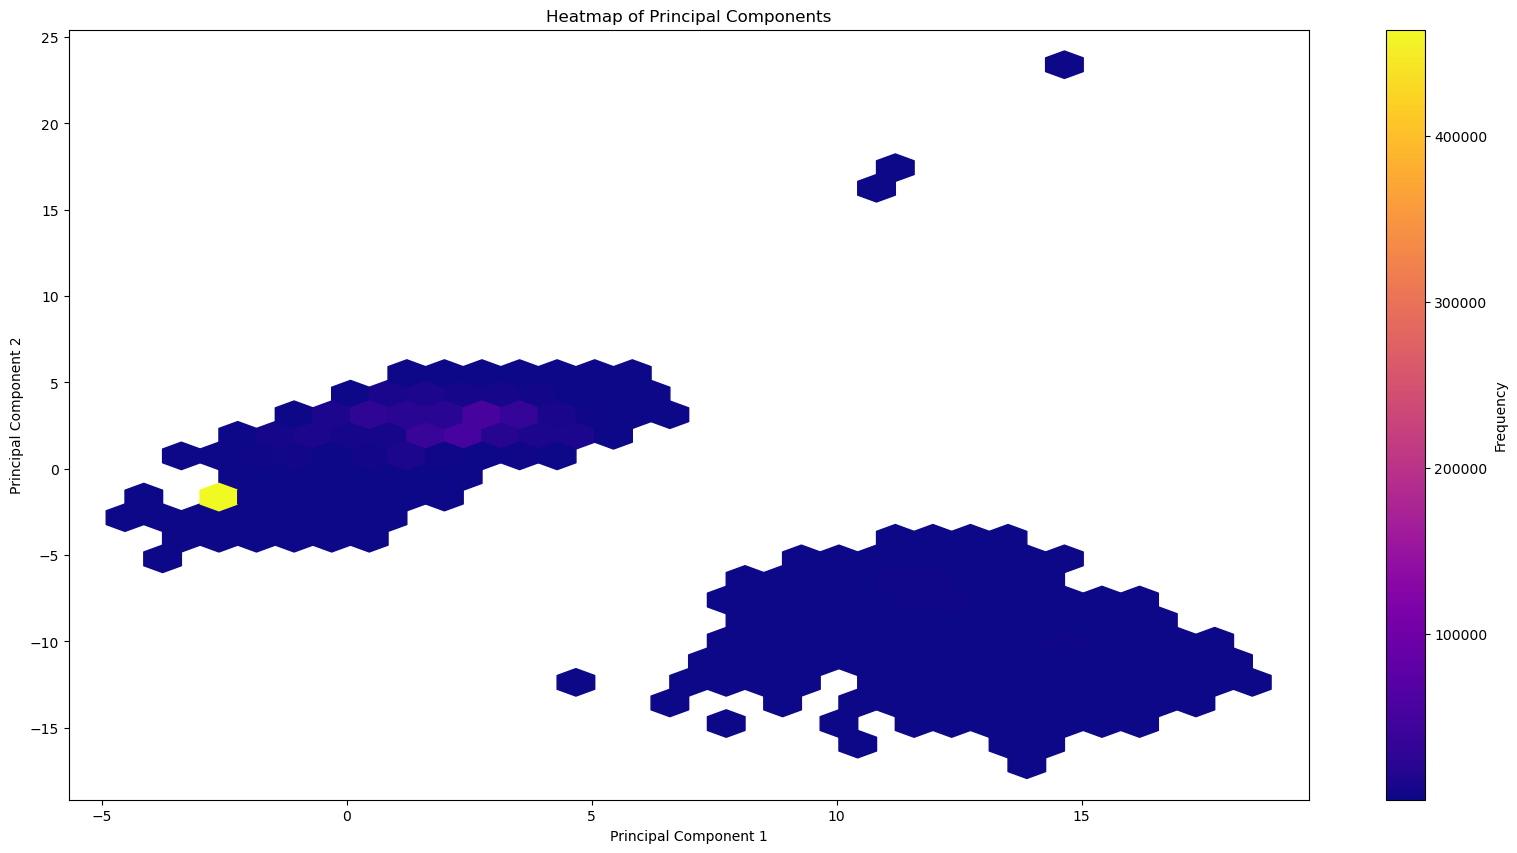

In [39]:
#Heatmap
plt.figure(figsize=(20,10))
plt.hexbin(pca_df['PC1'], pca_df['PC2'], gridsize=30, cmap='plasma', mincnt=1)
plt.colorbar(label='Frequency')
plt.title('Heatmap of Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

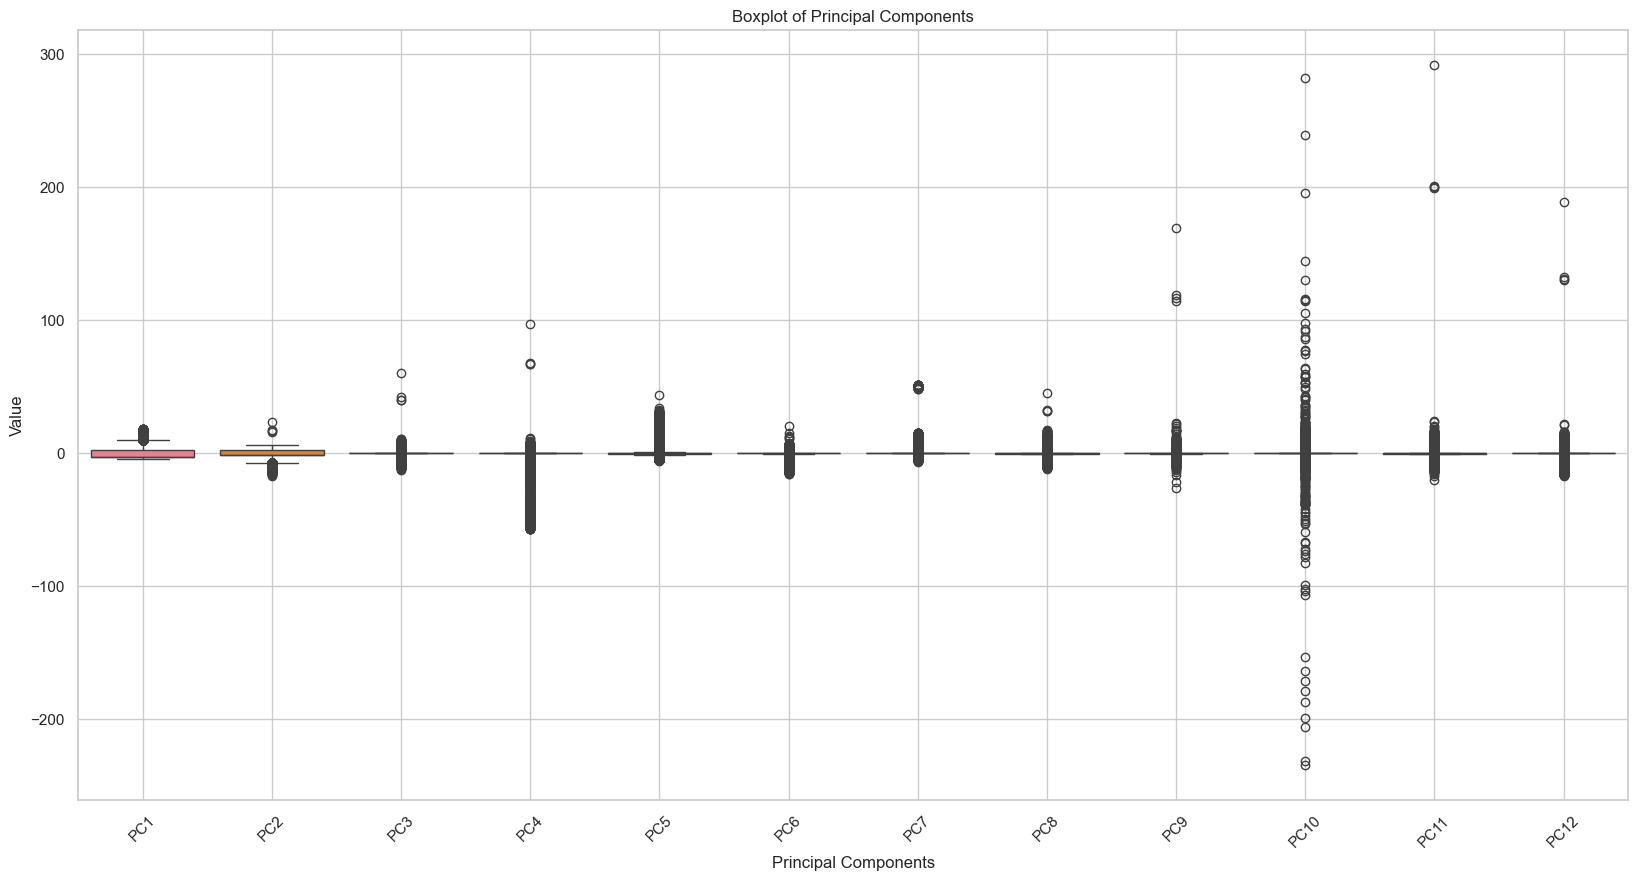

In [41]:
#Boxplot
sns.set(style="whitegrid", palette="deep")
plt.figure(figsize=(20, 10))
sns.boxplot(data=pca_df)
plt.title('Boxplot of Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [55]:
# CLV Calculation
ren_rate = 0.8  
tashi_df['Total_Sales'] = tashi_df['UnitPrice'] * tashi_df['Quantity']

tashi_apv = tashi_df.groupby('CustomerID')['Total_Sales'].mean()
tashi_pf = tashi_df.groupby('CustomerID').size().mean()
tashi_clv = (tashi_apv * tashi_pf) / (1 - ren_rate)

clv_df = pd.DataFrame({
    'CustomerID': tashi_clv.index,
    'CLV': tashi_clv.values
})

if 'CLV' in tashi_df.columns:
    tashi_df = tashi_df.rename(columns={'CLV': 'CLV_old'})

tashi_df = tashi_df.merge(clv_df, on='CustomerID', how='left')

tashi_df.to_csv('tashi.csv', index=False)

print(tashi_df[['CustomerID', 'Total_Sales', 'CLV']].head())
print("\n\n")
print(tashi_df[['CustomerID', 'Total_Sales', 'CLV']].tail())


   CustomerID  Total_Sales           CLV
0     17850.0        15.30  20322.569447
1     17850.0        20.34  20322.569447
2     17850.0        22.00  20322.569447
3     17850.0        20.34  20322.569447
4     17850.0        20.34  20322.569447



          CustomerID  Total_Sales           CLV
1048570  15287.69057    44.046508  44397.289188
1048571  15287.69057    44.046508  44397.289188
1048572  15287.69057    44.046508  44397.289188
1048573  15287.69057    44.046508  44397.289188
1048574  15287.69057    44.046508  44397.289188


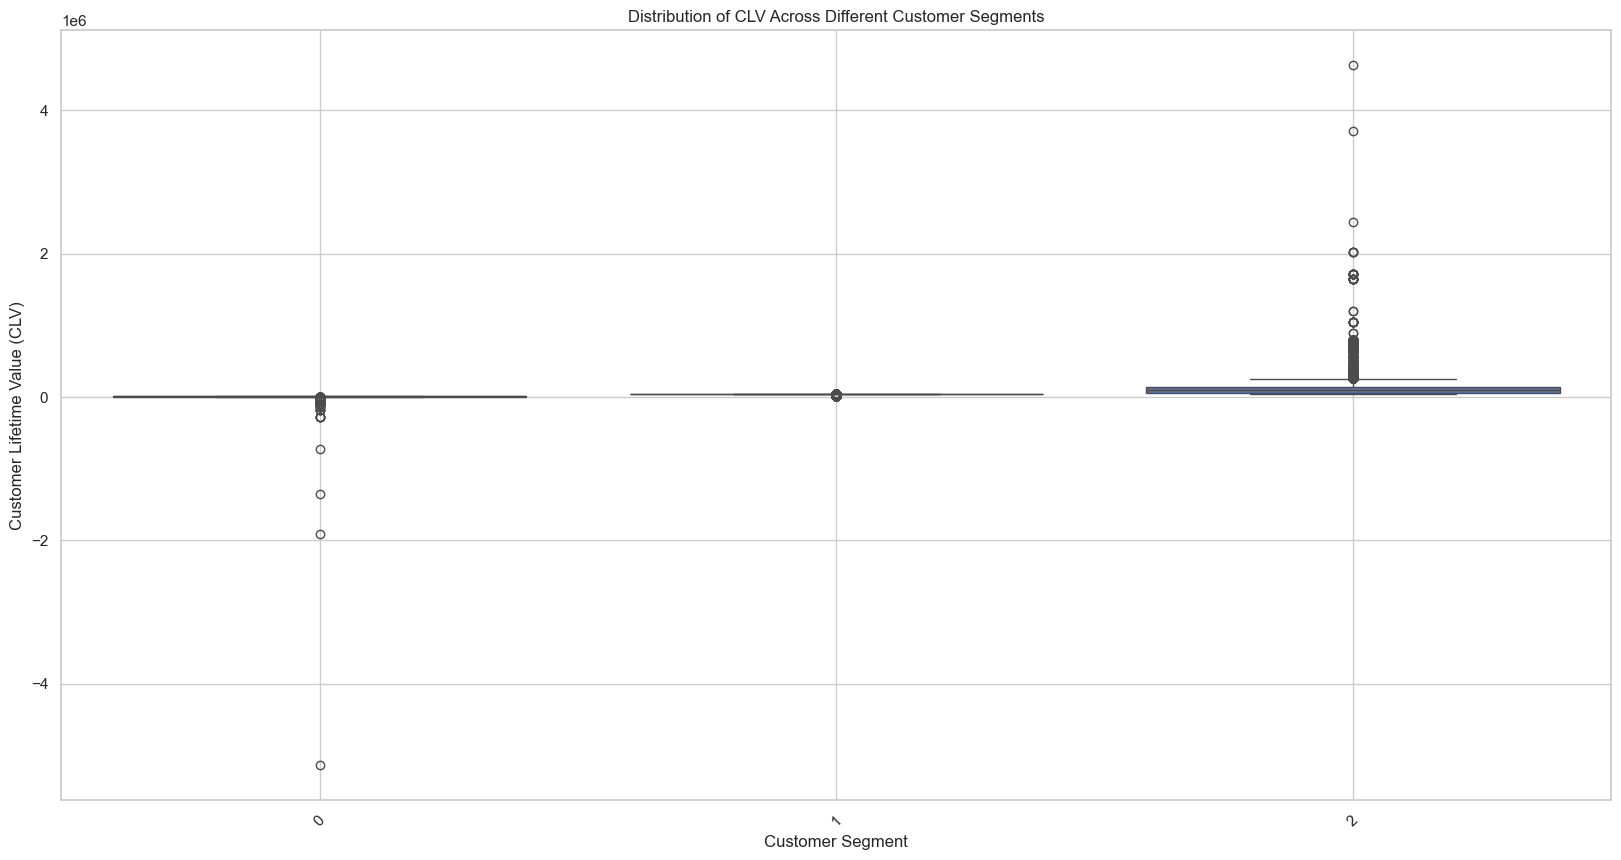

In [83]:
#Visulaize CLV
num_segments =5
tashi_df['CLV_Segment'] = pd.qcut(tashi_df['CLV'], q=num_segments, labels=False, duplicates='drop')

tashi_df['CLV_Segment'] = tashi_df['CLV_Segment'].astype('category')
plt.figure(figsize=(20,10))
sns.boxplot(x='CLV_Segment', y='CLV', data=tashi_df)
plt.title('Distribution of CLV Across Different Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Customer Lifetime Value (CLV)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_5260\1051013615.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='CLV_Segment', y='CLV', data=tashi_df, palette='Set2')


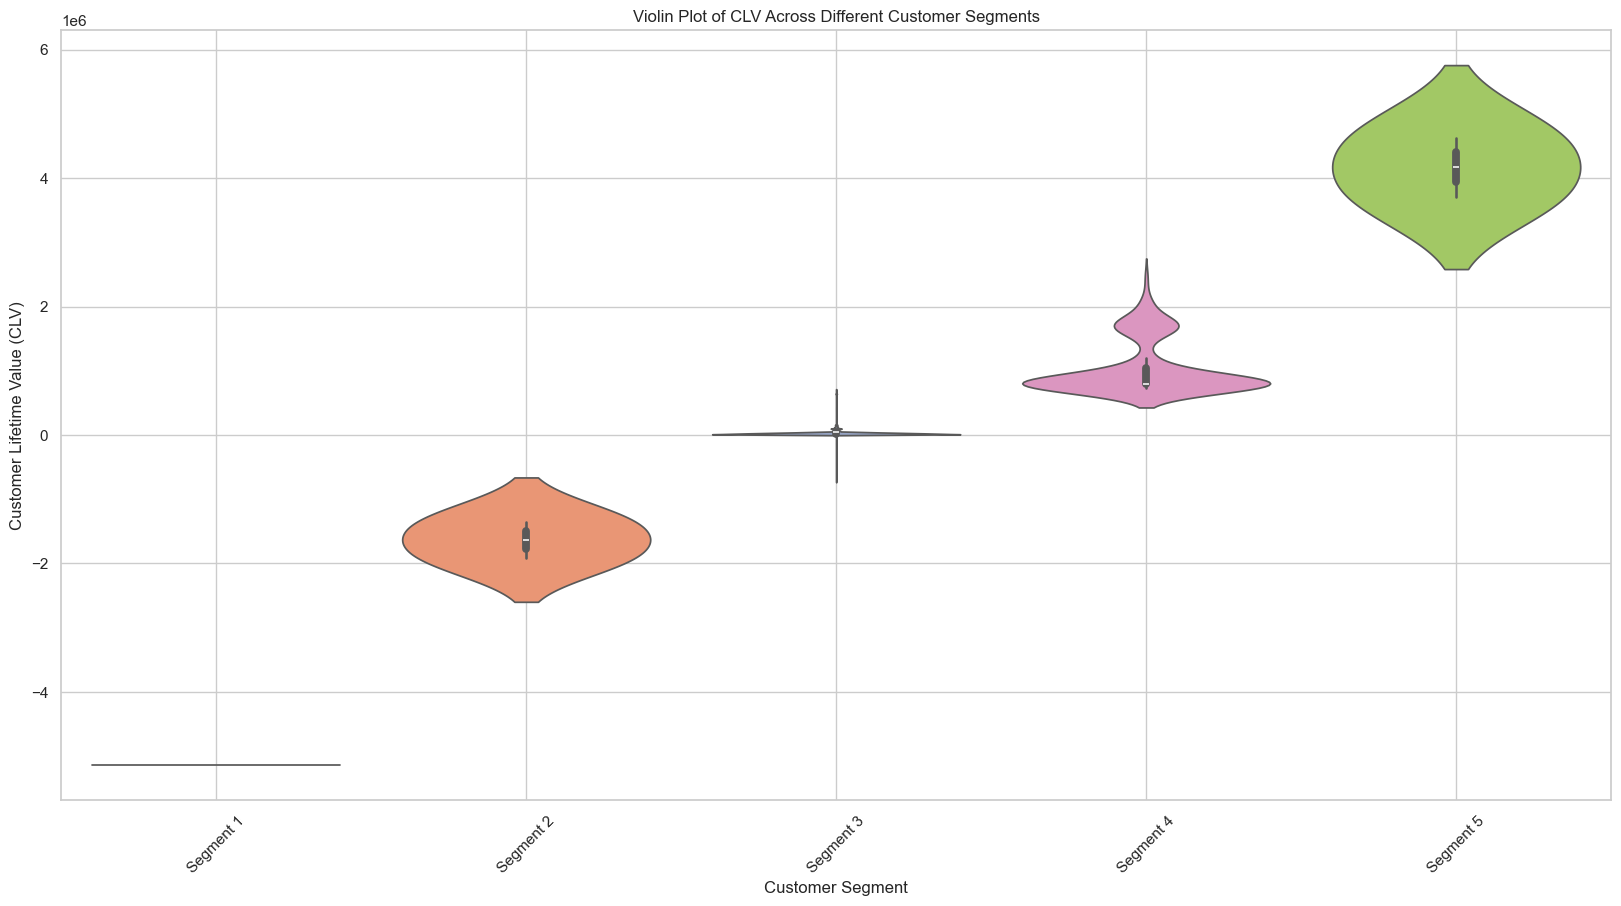

In [103]:
num_segments = 5

bin_edges = pd.cut(tashi_df['CLV'], bins=num_segments, retbins=True)[1]
labels = [f'Segment {i+1}' for i in range(len(bin_edges) - 1)]
tashi_df['CLV_Segment'] = pd.cut(tashi_df['CLV'], bins=bin_edges, labels=labels, include_lowest=True)
tashi_df['CLV_Segment'] = tashi_df['CLV_Segment'].astype('category')
# Violin Plot
plt.figure(figsize=(20, 10))
sns.violinplot(x='CLV_Segment', y='CLV', data=tashi_df, palette='Set2')
plt.title('Violin Plot of CLV Across Different Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Customer Lifetime Value (CLV)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_5260\1721114425.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = tashi_df.groupby('CLV_Segment')['CLV'].agg(['mean']).reset_index()


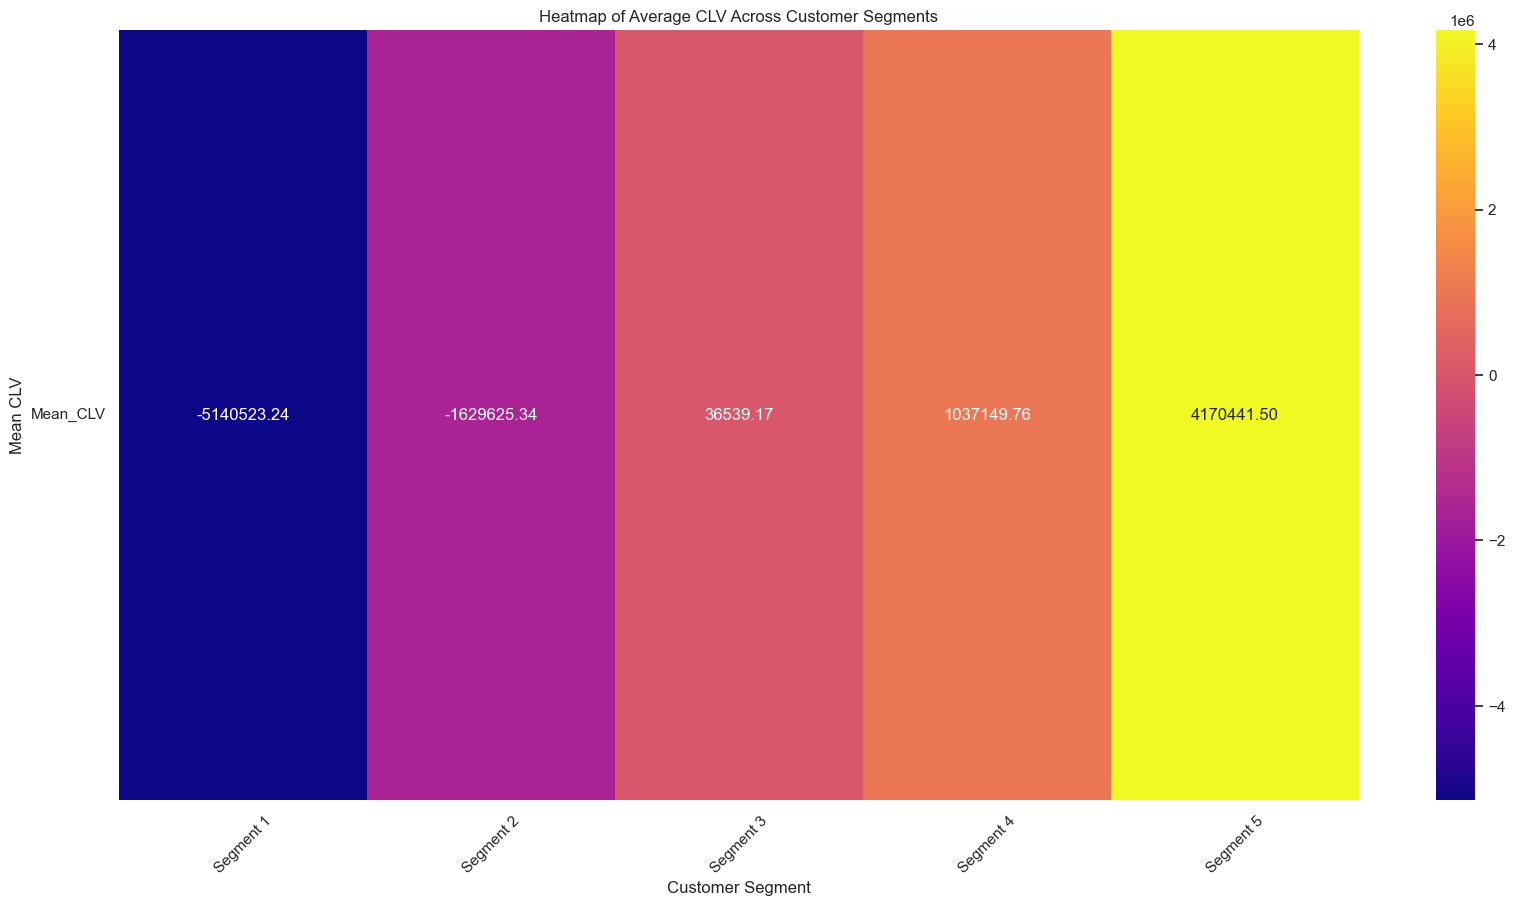

In [135]:
#Heatmap for CLV
bin_edges = pd.cut(tashi_df['CLV'], bins=num_segments, retbins=True)[1]
labels = [f'Segment {i+1}' for i in range(num_segments)]
tashi_df['CLV_Segment'] = pd.cut(tashi_df['CLV'], bins=bin_edges, labels=labels, include_lowest=True)
#CLV by segments
agg_df = tashi_df.groupby('CLV_Segment')['CLV'].agg(['mean']).reset_index()
agg_df.columns = ['CLV_Segment', 'Mean_CLV']
heatmap_data = agg_df.set_index('CLV_Segment').T

# Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(heatmap_data, cmap='plasma', annot=True, fmt=".2f", cbar=True)
plt.title('Heatmap of Average CLV Across Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Mean CLV')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

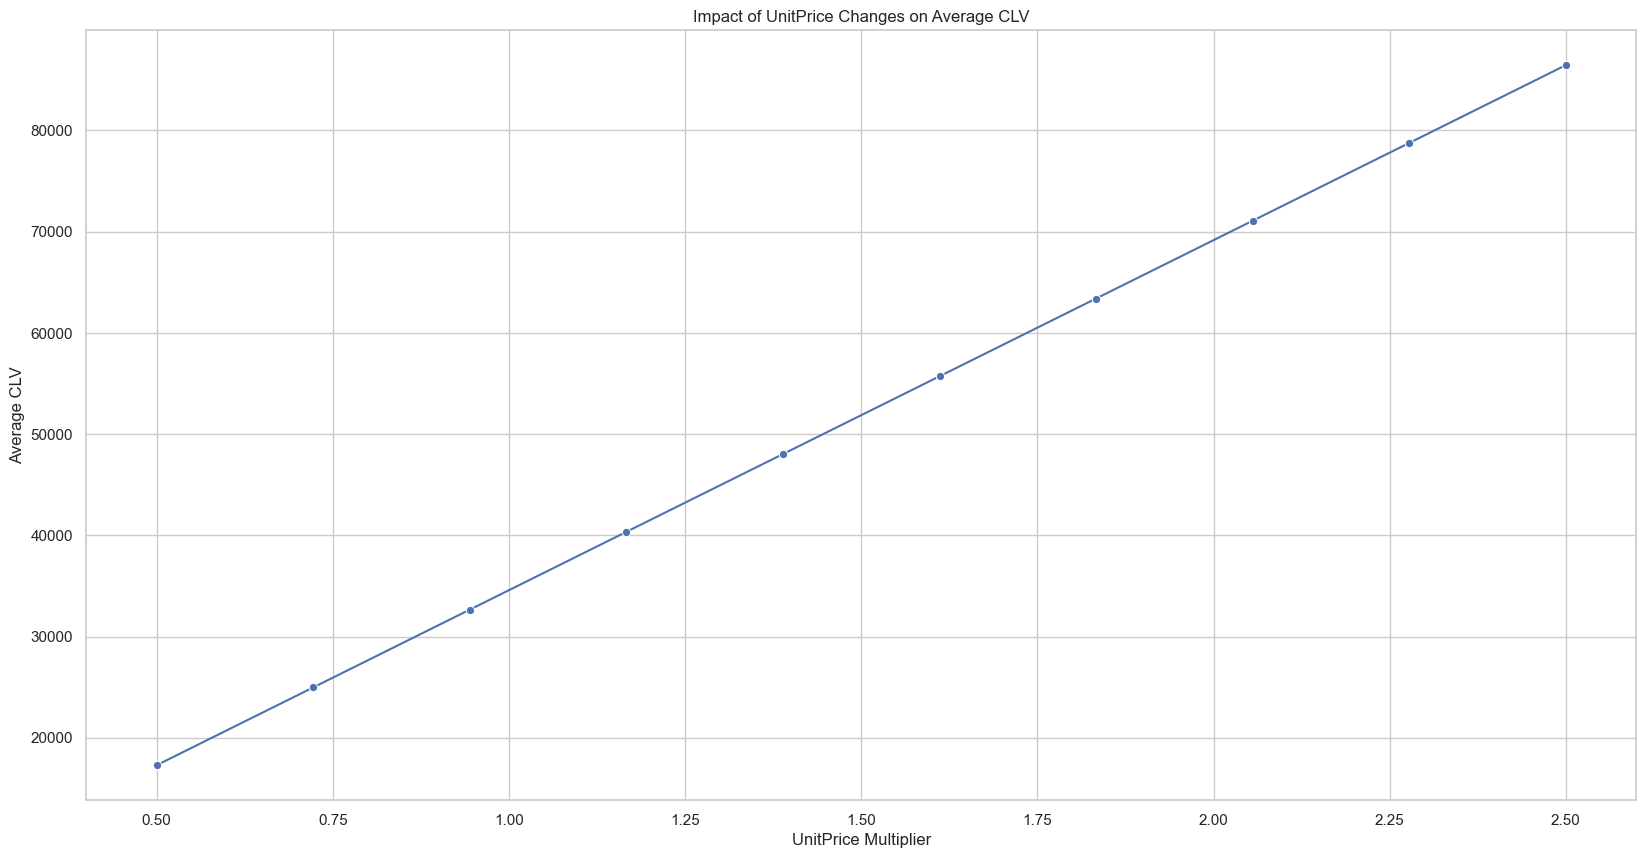

In [139]:
#What-if Analysis
price_changes = np.linspace(0.5, 2.5, num=10)
clv_results = []

for change in price_changes:
    modified_df = tashi_df.copy()
    modified_df['UnitPrice'] *= change
    modified_df['Total_Sales'] = modified_df['UnitPrice'] * modified_df['Quantity']
    
    modified_apv = modified_df.groupby('CustomerID')['Total_Sales'].mean()
    modified_pf = modified_df.groupby('CustomerID').size().mean()
    modified_clv = (modified_apv * modified_pf) / (1 - 0.8)
    
    clv_results.append(modified_clv.mean())

results_df = pd.DataFrame({
    'UnitPrice Multiplier': price_changes,
    'Average CLV': clv_results
})

# Visualization
plt.figure(figsize=(20,10))
sns.lineplot(data=results_df, x='UnitPrice Multiplier', y='Average CLV', marker='o')
plt.title('Impact of UnitPrice Changes on Average CLV')
plt.xlabel('UnitPrice Multiplier')
plt.ylabel('Average CLV')
plt.grid(True)
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_5260\2587847299.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=heatmap_data, x='UnitPrice Multiplier', y='Average CLV', palette='viridis')


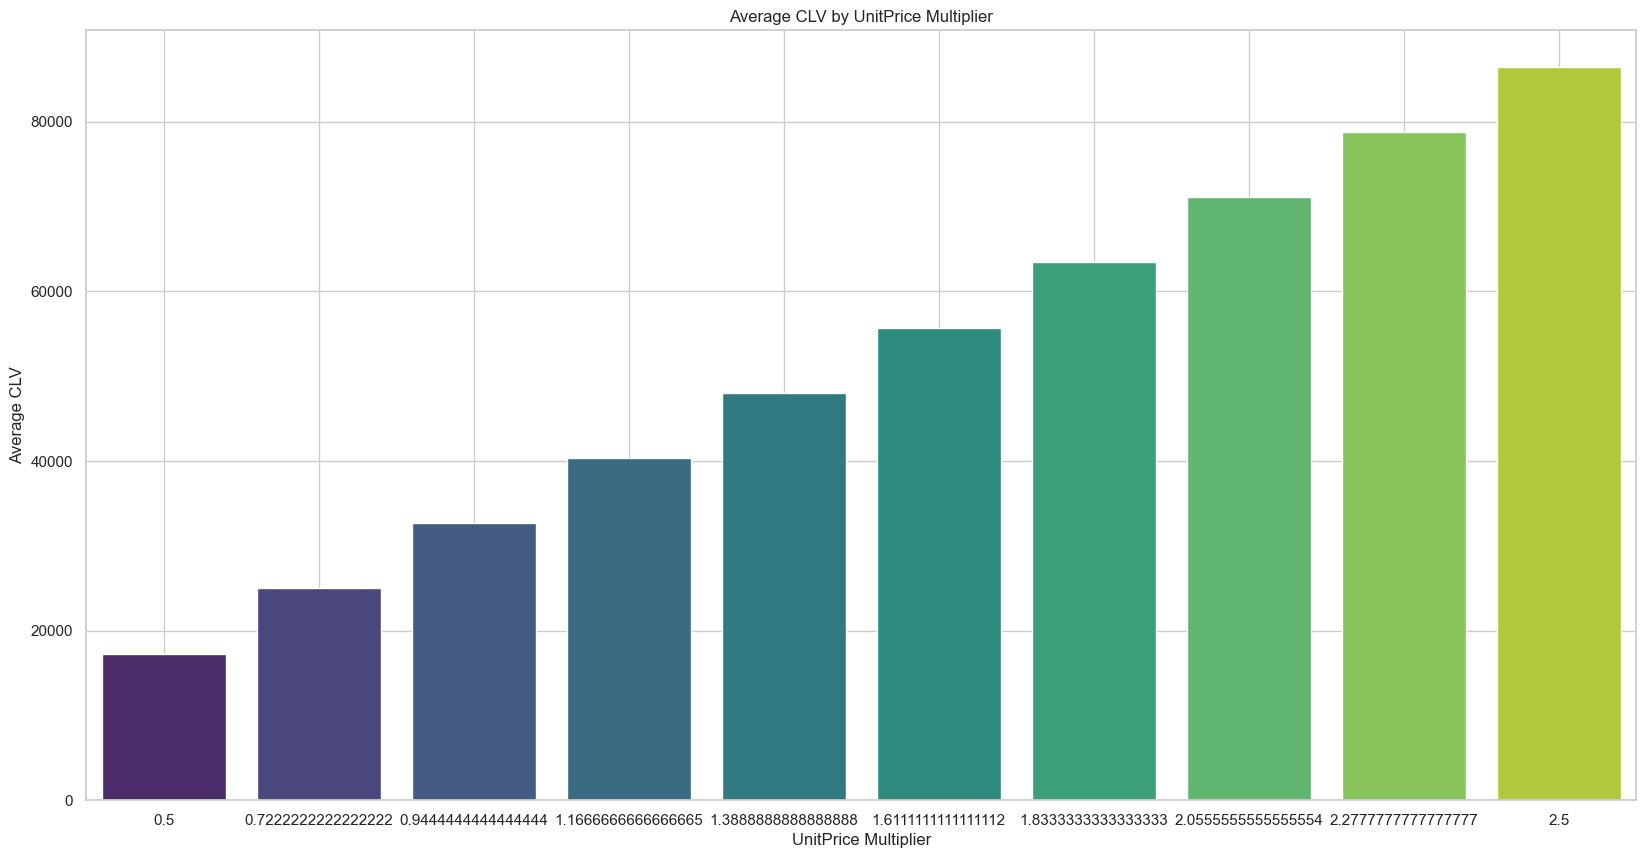

In [146]:
#Barplot
plt.figure(figsize=(20,10))
sns.barplot(data=heatmap_data, x='UnitPrice Multiplier', y='Average CLV', palette='viridis')
plt.title('Average CLV by UnitPrice Multiplier')
plt.xlabel('UnitPrice Multiplier')
plt.ylabel('Average CLV')
plt.grid(True)
plt.show()

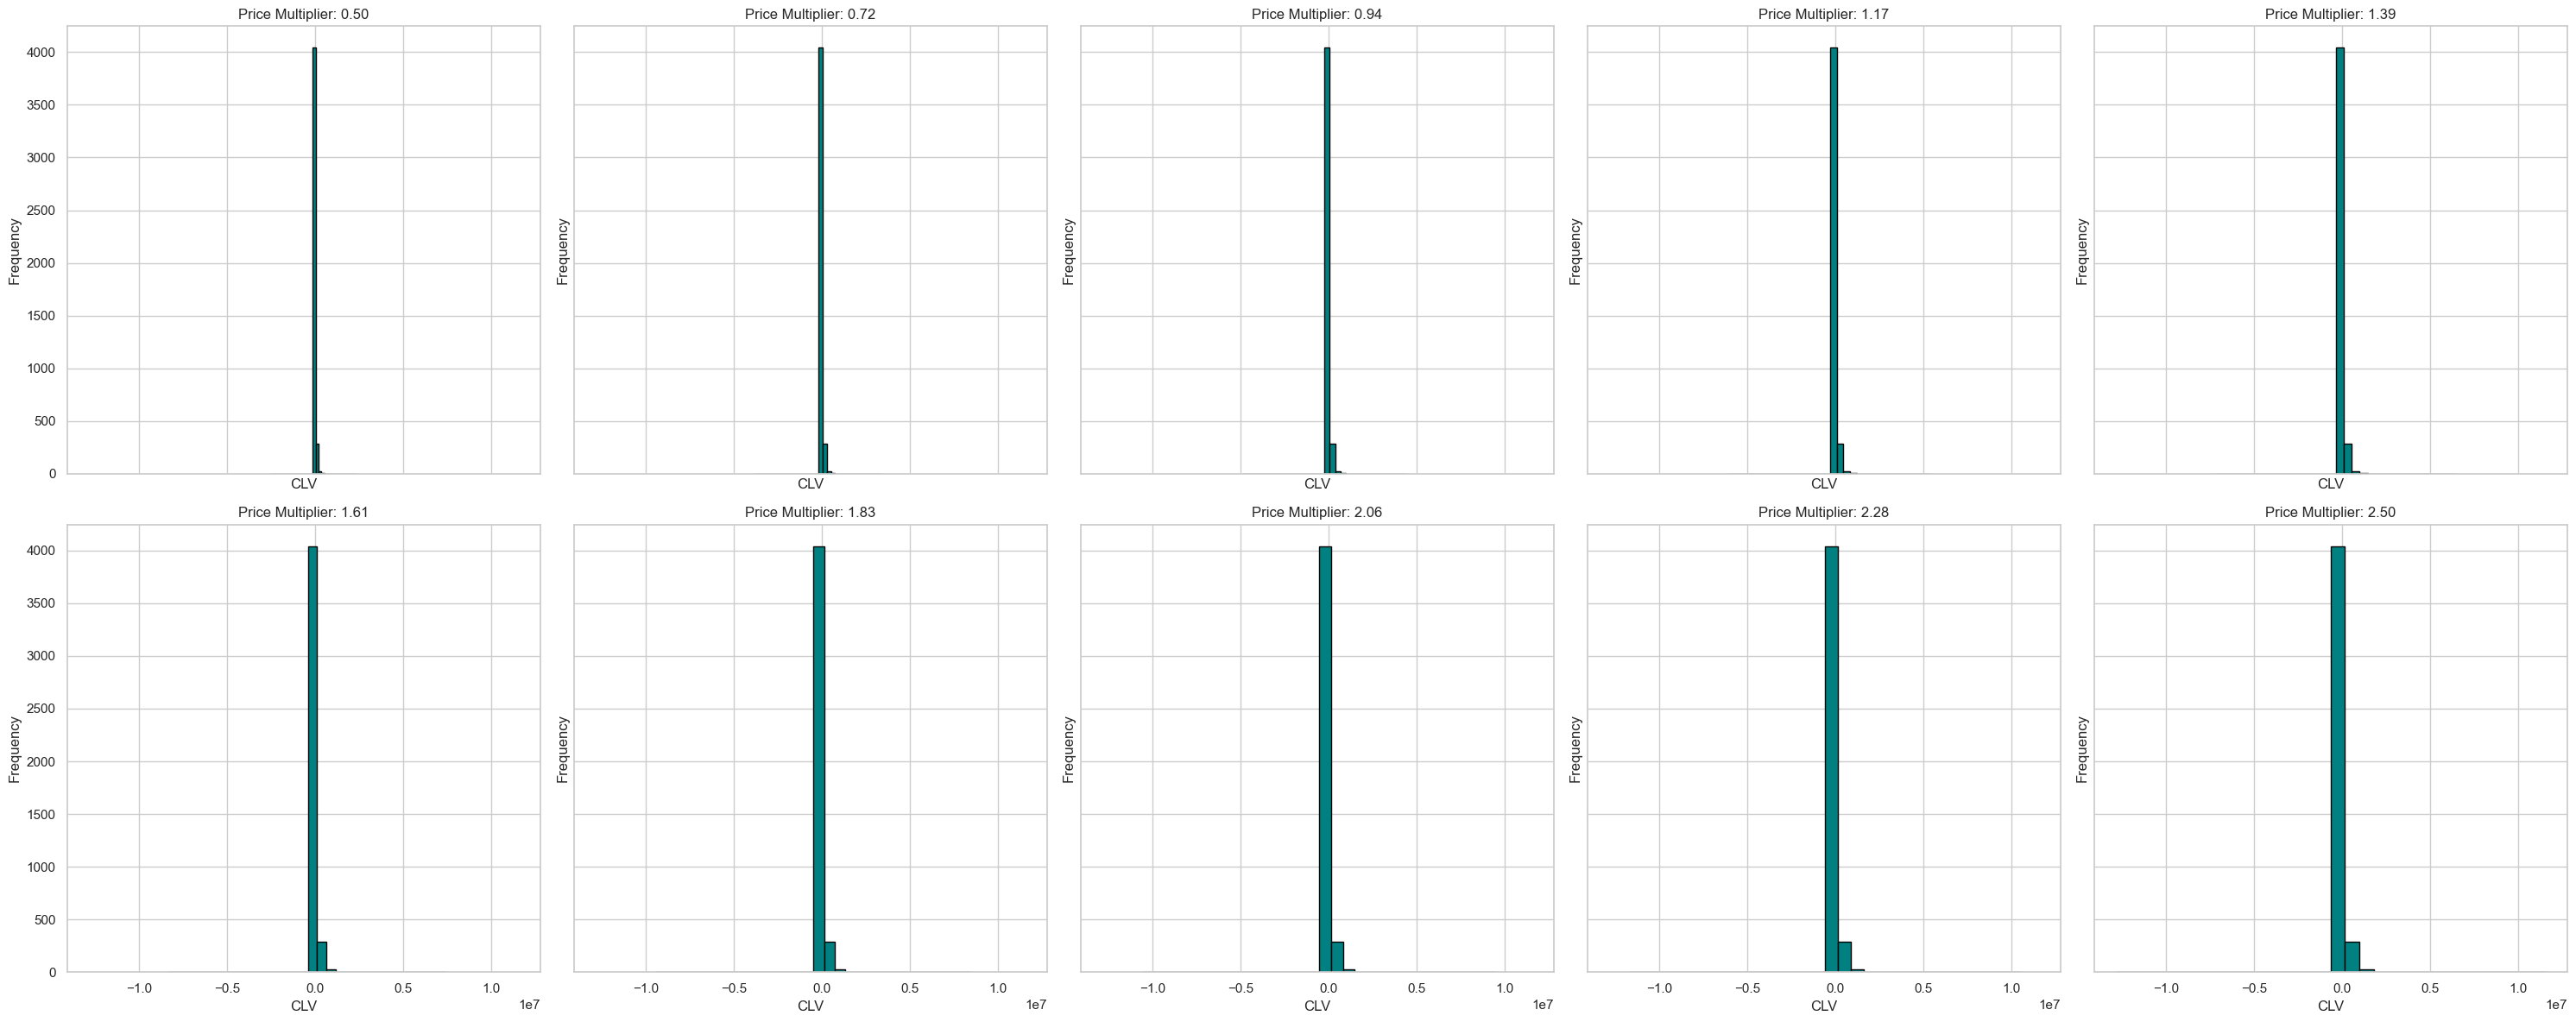

In [148]:
#Histogram
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(30,12), sharex=True, sharey=True)
axes = axes.flatten()
for i, change in enumerate(price_changes):
    modified_df = tashi_df.copy()
    modified_df['UnitPrice'] *= change
    modified_df['Total_Sales'] = modified_df['UnitPrice'] * modified_df['Quantity']
    
    modified_apv = modified_df.groupby('CustomerID')['Total_Sales'].mean()
    modified_pf = modified_df.groupby('CustomerID').size().mean()
    modified_clv = (modified_apv * modified_pf) / (1 - 0.8)
    
    axes[i].hist(modified_clv, bins=30, color='teal', edgecolor='black')
    axes[i].set_title(f'Price Multiplier: {change:.2f}')
    axes[i].set_xlabel('CLV')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

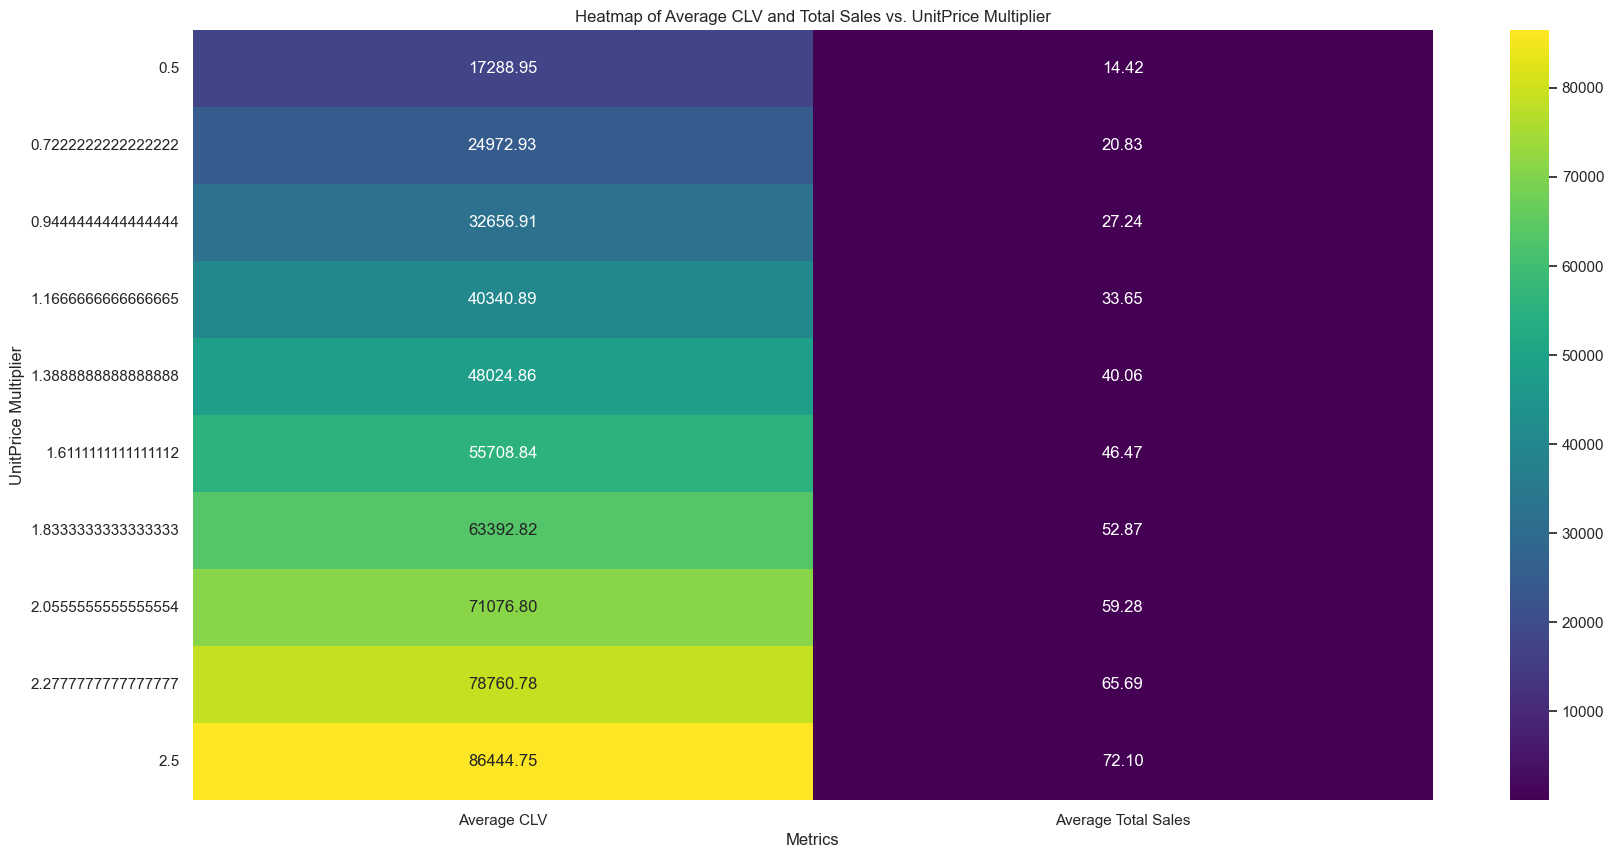

In [150]:
#Heatmap
heatmap_data.set_index('UnitPrice Multiplier', inplace=True)
plt.figure(figsize=(20,10))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2f")
plt.title('Heatmap of Average CLV and Total Sales vs. UnitPrice Multiplier')
plt.xlabel('Metrics')
plt.ylabel('UnitPrice Multiplier')
plt.show()